In [0]:
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [0]:
#Lendo o arquivo "heart"
heart = pd.read_csv('https://s3-sa-east-1.amazonaws.com/dados-leonardo/heart.csv')

In [3]:
#Verificando os dados do dataset
heart.head()

#AGE: IDADE
#SEX: SEXO
#CP (CHEST PAIN TYPE): TIPO DE DOR NO PEITO
#TRESTBPS: PRESSÃO ARTERIAL EM REPOUSO
#CHOL: COLESTEROL SERICO
#FBS: açúcar no sangue em jejum > 120 mg / dl = 1 OU 0 = FALSO
#restecg: resultados eletrocardiográficos em repouso
#thalach: frequência cardíaca máxima alcançada
#exang: angina induzida por exercício (1 = sim; 0 = não)
#oldpeak: Depressão do segmento ST induzida pelo exercício em relação ao repouso
#slope: a inclinação do segmento ST de pico de exercício
#CA: número de grandes vasos (0-3) colorido por fluoroscopia
#thal: 3 = normal; 6 = defeito fixo; 7 = defeito reversível
# TARGET: VARIAVEL RESPOSTA

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


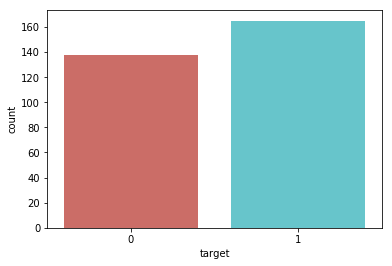

In [4]:
sb.countplot(x='target',data=heart, palette='hls')

In [5]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


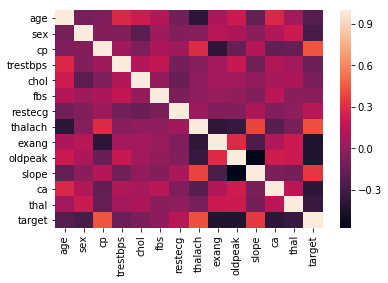

In [8]:
# # Validando independencia entre as variáveis

sb.heatmap(heart.corr())  

In [0]:
#Separar o conjunto em variavel resposta e variaveis de treinamento

X = heart.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12]].values
y = heart.iloc[:,13].values

In [0]:
# Agora dividir em treino e teste (teste com 30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [0]:
#Aplicando o modelo
Classif_tree = DecisionTreeClassifier()
Classif_tree.fit(X_train, y_train)
y_pred = Classif_tree.predict(X_test)

In [32]:
#métrica
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.68      0.65        40
           1       0.73      0.69      0.71        51

   micro avg       0.68      0.68      0.68        91
   macro avg       0.68      0.68      0.68        91
weighted avg       0.68      0.68      0.68        91

0.6813186813186813


In [0]:
import os
os.environ['PATH'].split(os.pathsep)
os.environ['PATH'] += os.pathsep + 'C:\\Users\\leleite\\Desktop\\IA\\00-AULAS\\08-MODELOS DE IA\\graphviz-2.38\\release\\bin'

In [0]:
#Gerando gráfico da árvore

dot_data = StringIO()
export_graphviz(Classif_tree, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names =  heart.columns.values[0:12],
                class_names = ['Não saudável', 'Saudável'],
                special_characters=True)
 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [0]:
#sklearn.preprocessing.normalize(X)
#PRE-PROCESSAMENTO REALIZADO, POREM A ACURACIA CAI